In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from puancare_train import Trainer

In [2]:
tr=Trainer('/workspaces/master_thesis/CONCEPT_RELATIONSHIP.csv', '/workspaces/master_thesis/CONCEPT.csv')

In [3]:
model_two=tr.trainer(100)

/workspaces/master_thesis/build_graph.py:9: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data_concept = pd.read_csv(path_concept, sep='\t')


KeyboardInterrupt: 

In [5]:
from gensim.models.poincare import PoincareModel

In [6]:
model=PoincareModel.load('test_model')

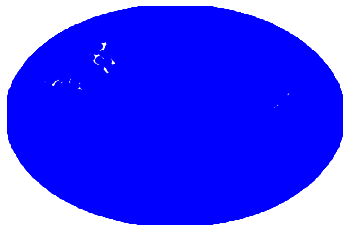

In [6]:
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('off')
plt.plot(model.kv.vectors[:,0], model.kv.vectors[:,1], 'bo')
plt.show()

In [7]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [11]:
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin
from bokeh.models import HoverTool
from bokeh import colors

output_file('image.html')

p = figure(title="Snomed 2D embedding after 100 epochs", #tools="wheel_zoom,pan,reset",
     match_aspect=True, background_fill_color='#440154')
p.grid.visible = False

bins = p.hexbin(model.kv.vectors[:,0],model.kv.vectors[:,1], 0.03, hover_color="yellow", hover_alpha=0.3)

In [12]:
show(p)

### Check link prediction

In [17]:
import random
import os
import smart_open

In [18]:
from build_graph import Builder

In [19]:
relationship_build=Builder('/workspaces/master_thesis/CONCEPT_RELATIONSHIP.csv', '/workspaces/master_thesis/CONCEPT.csv')

/workspaces/master_thesis/build_graph.py:9: DtypeWarning: Columns (6,9) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data_concept = pd.read_csv(path_concept, sep='\t')


In [20]:
connection_list=list(relationship_build())

/workspaces/master_thesis/build_graph.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_merge_2=data_merge_2[data_merge_2.standard_concept_x=='S'][data_merge_2.standard_concept_y=='S']


In [32]:
import pandas as pd
df=pd.DataFrame(connection_list)

In [38]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [40]:
train.to_csv('rlationships_train.csv', index=False, sep='\t')

In [41]:
test.to_csv('rlationships_test.csv', index=False, sep='\t')

### Part for evaluation 

In [ ]:
from gensim.models.poincare import PoincareModel
model=PoincareModel.load('model_10d')

: 

In [18]:
from gensim.models.poincare import LinkPredictionEvaluation

In [19]:
import pandas as pd

In [20]:
model.kv

In [21]:
result=LinkPredictionEvaluation('/workspaces/master_thesis/rlationships_train.csv','/workspaces/master_thesis/rlationships_test.csv', model.kv)

In [22]:
evaluation=result.evaluate()

In [23]:
evaluation

{'mean_rank': 2031.9448705203924, 'MAP': 0.07019781177114313}

In [ ]:
df_eval=pd.DataFrame(evaluation, index=[0])

In [ ]:
df_eval.to_csv('linkpred_10d.csv', index=False)

In [ ]:
from gensim.models.poincare import ReconstructionEvaluation

In [ ]:
result_of_reconstruction=ReconstructionEvaluation('/workspaces/master_thesis/rlationships_train.csv', model.kv)

In [ ]:
const=result_of_reconstruction.evaluate()

In [ ]:
const

{'mean_rank': 21566.111900954602, 'MAP': 0.03327781200256625}

In [ ]:
df_eval_const=pd.DataFrame(const, index=[0])

In [ ]:
df_eval_const.to_csv('construct_5d.csv', index=False)